In [30]:
import  numpy  as np 
csv_path = "mtfuji_data.csv"
np.set_printoptions(suppress= True )
fuji = np.loadtxt(csv_path, delimiter= "," , skiprows= 1 )
print(fuji.shape)
print(fuji[130:140])

(300, 5)
[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


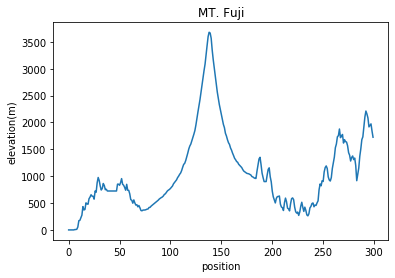

In [74]:
# problem 1

%matplotlib inline
import matplotlib.pyplot as plt

plt.title("MT. Fuji")
plt.xlabel("position")
plt.ylabel("elevation(m)")
plt.plot(fuji[:,0],fuji[:,3])
plt.show()

In [26]:
# problem 2

# a a function to calculate the slope or gradient
def calculate_slope(point):
# calculate the change in elevation and postion according to the point given
    change_in_elevation = fuji[:,0][point] -  fuji[:,0][point-1]
    change_in_position = fuji[:,3][point] -  fuji[:,3][point-1]
    slope = change_in_position/change_in_elevation
    return slope

print(calculate_slope(0))

5.77190635451505


In [28]:
# problem 3
def calculate_destination(current_point,alpha,slope):
    destination_point = current_point - alpha*slope
    if(destination_point < 0):
        return 0
    else:
        return round(destination_point)

# get the slope
alpha = 0.2
current_point = 50
slope = calculate_slope(current_point)
print(calculate_destination(current_point,alpha,slope))

54.0


In [107]:
# problem 4
def calculate_going_down(current_position_1,alpha_1):
    slope_1 = calculate_slope(current_position_1)
    positions = [current_position_1]
    for counter in range(fuji.size):
        current_position_1 = int(calculate_destination(current_position_1,alpha_1,slope_1))
        if(positions[-1] == current_position_1):
            break
        else:
            positions.append(current_position_1)
    return positions
alpha_2 = 0.2
print(calculate_going_down(136,alpha_2))

[136, 102, 68, 34, 0]


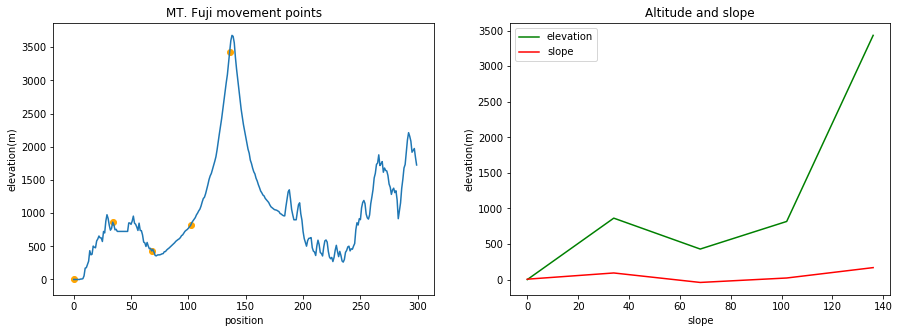

In [108]:
# problem 5

# Display points moved in cross section as dots

positions_array = calculate_going_down(136,alpha_2)


figure = plt.figure(figsize=(15,5))

fig1 = figure.add_subplot(1,2,1)

fig1.set_title("MT. Fuji movement points")
fig1.set_xlabel("position")
fig1.set_ylabel("elevation(m)")
fig1.plot(fuji[:,0],fuji[:,3])
fig1.scatter(positions_array,[fuji[position_2, 3] for position_2 in positions_array],c="orange")
# plt.show()

# Make a line graph of the altitude and slope for each iteration

fig2 = figure.add_subplot(1,2,2)

fig2.set_title("Altitude and slope")
fig2.set_xlabel("slope")
fig2.set_ylabel("elevation(m)")
fig2.plot(positions_array,[fuji[position_2, 3] for position_2 in positions_array],c="green",label="elevation")
fig2.plot(positions_array,[calculate_slope(position_2) for position_2 in positions_array],c="red",label="slope")
fig2.legend()
plt.show()


<Figure size 1080x360 with 0 Axes>

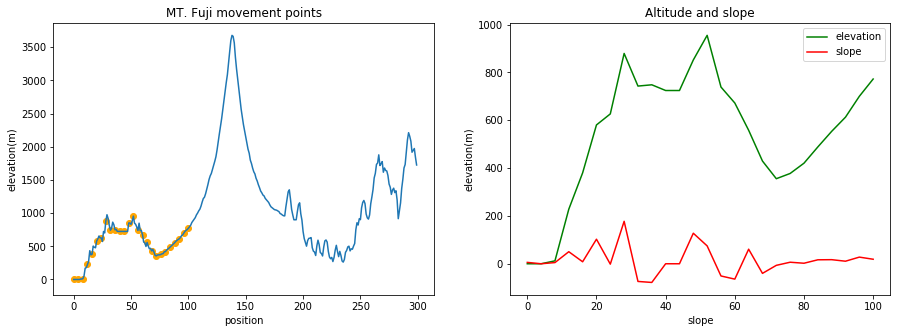

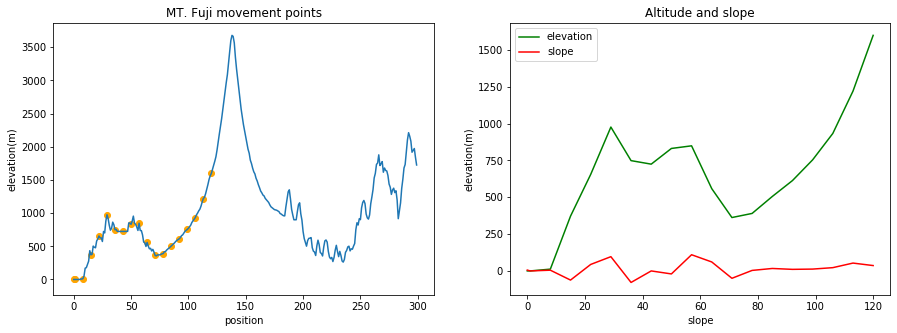

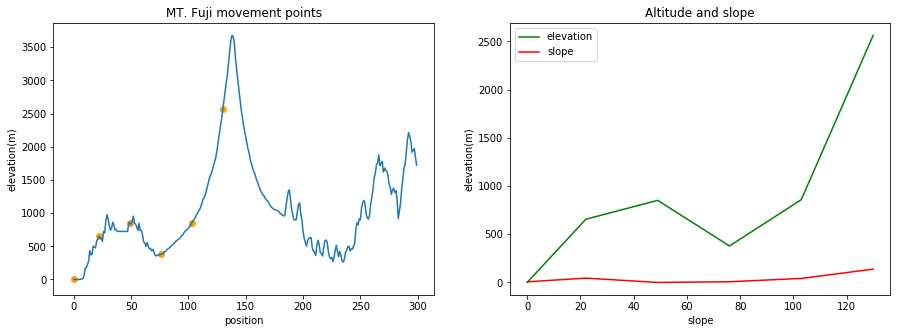

In [110]:
# problem 5

# Display points moved in cross section as dots on other points
def display_graph_on_give_points(points):
    
    figure = plt.figure(figsize=(15,5))
    alpha_3 = 0.2
    for point_5 in range(points.size):
        
        positions_array_1 = calculate_going_down(points[point_5],alpha_3)
                
        figure = plt.figure(figsize=(15,5))

        fig1 = figure.add_subplot(1,2,1)

        fig1.set_title("MT. Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0],fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="orange")

        # Make a line graph of the altitude and slope for each iteration

        fig2 = figure.add_subplot(1,2,2)

        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="green",label="elevation")
        fig2.plot(positions_array_1,[calculate_slope(position_2) for position_2 in positions_array_1],c="red",label="slope")
        fig2.legend()
        plt.show()
        
points = np.array([100,120,130])
display_graph_on_give_points(points)

<Figure size 1080x360 with 0 Axes>

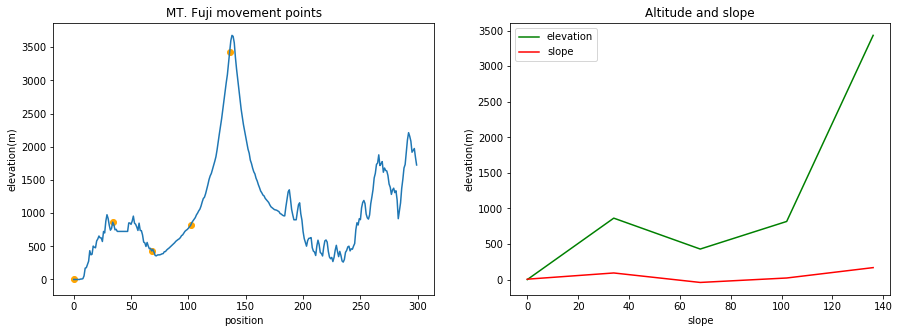

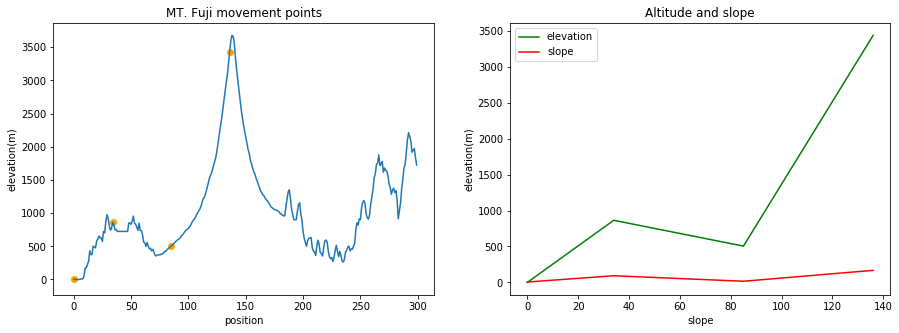

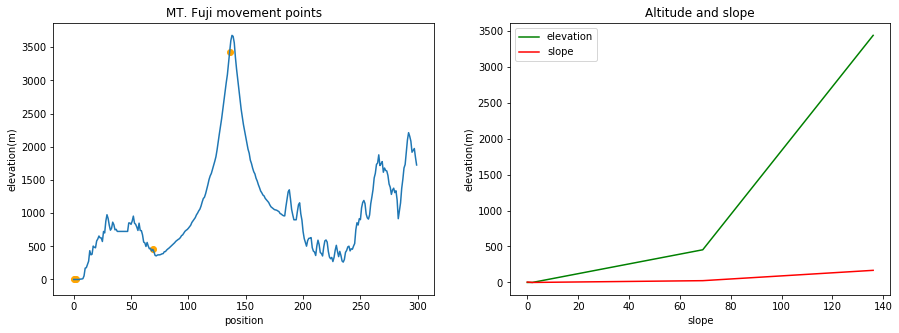

In [111]:
# problem 7

def display_graph_on_give_alpha_points(alphas):
        
    figure = plt.figure(figsize=(15,5))
    
    for point_6 in range(alphas.size):
        
        positions_array_1 = calculate_going_down(136,alphas[point_6])
                
        figure = plt.figure(figsize=(15,5))

        fig1 = figure.add_subplot(1,2,1)

        fig1.set_title("MT. Fuji movement points")
        fig1.set_xlabel("position")
        fig1.set_ylabel("elevation(m)")
        fig1.plot(fuji[:,0],fuji[:,3])
        fig1.scatter(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="orange")

        # Make a line graph of the altitude and slope for each iteration

        fig2 = figure.add_subplot(1,2,2)

        fig2.set_title("Altitude and slope")
        fig2.set_xlabel("slope")
        fig2.set_ylabel("elevation(m)")
        fig2.plot(positions_array_1,[fuji[position_2, 3] for position_2 in positions_array_1],c="green",label="elevation")
        fig2.plot(positions_array_1,[calculate_slope(position_2) for position_2 in positions_array_1],c="red",label="slope")
        fig2.legend()
        plt.show()
        
alphas_1 = np.array([0.2,0.3,0.4])
display_graph_on_give_alpha_points(alphas_1)